## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




## Data Understanding
### Loading necessary packages

In [24]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



## Read csv file

In [25]:
#To read csv file and create dataframe
tweets = pd.read_csv('C:/Users/melak/Desktop/Week_0/Twitter-Data-Analysis/data/economic_clean_data.csv')
tweets.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,statuses_count,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's a...,1,0.16,0.540000,en,281,188.0,43.0,davideiacovozzi,58634,55,NaN,gold,NorthstarCharts,NaN
1,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,"German 10y mortgage rate went from 0,8% to 2,5...",1,0.15,0.175000,en,281,179.0,32.0,davideiacovozzi,40980,55,NaN,NaN,MichaelAArouet,NaN
2,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,When? https://t.co/kO2FfHKaZg,-1,0.00,0.000000,en,281,193.0,26.0,davideiacovozzi,37461,55,False,NaN,goldseek,NaN
3,Thu Apr 21 17:22:09 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,The 30-year mortgage rate in the US rises to 5...,-1,0.00,0.066667,en,281,620.0,213.0,davideiacovozzi,383561,55,NaN,NaN,charliebilello,NaN
4,Thu Apr 21 10:32:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,Rates rise until something breaks … is anythin...,0,-0.40,0.400000,en,281,1787.0,417.0,davideiacovozzi,182570,55,False,NaN,biancoresearch,NaN


## Get info about missing data

In [26]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16465 entries, 0 to 16464
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16465 non-null  object 
 1   source              16465 non-null  object 
 2   original_text       16465 non-null  object 
 3   clean_text          8220 non-null   object 
 4   sentiment           16465 non-null  int64  
 5   polarity            16465 non-null  float64
 6   subjectivity        16465 non-null  float64
 7   lang                16465 non-null  object 
 8   statuses_count      16465 non-null  int64  
 9   favorite_count      16465 non-null  float64
 10  retweet_count       16465 non-null  float64
 11  original_author     16465 non-null  object 
 12  followers_count     16465 non-null  int64  
 13  friends_count       16465 non-null  int64  
 14  possibly_sensitive  6206 non-null   object 
 15  hashtags            5278 non-null   object 
 16  user

#### Check if there are errors in the data

In [6]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 39705
Columons having columns value:Index(['clean_text', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')


In [9]:
print("Columns that have missing value(s)\n:{}".format(tweets.columns[tweets.isnull().any()]))

Columns that have missing value(s)
:Index(['clean_text', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [15]:
import sys
import os

In [37]:
tweets_df = pd.DataFrame(columns=['original_text','sentiment','lang','hashtags', 'clean_text'])

tweets_df['original_text'] =  tweets['original_text'].to_list()
tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] = tweets['hashtags'].to_list()
tweets_df['clean_text'] = tweets['clean_text'].to_list()
tweets_df.head()

,original_text,sentiment,lang,hashtags,clean_text
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,gold,The 10-year yield is telling us that there's a...
1,RT @MichaelAArouet: German 10y mortgage rate w...,1,en,NaN,"German 10y mortgage rate went from 0,8% to 2,5..."
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,-1,en,NaN,When? https://t.co/kO2FfHKaZg
3,RT @charliebilello: The 30-year mortgage rate ...,-1,en,NaN,The 30-year mortgage rate in the US rises to 5...
4,RT @biancoresearch: Rates rise until something...,0,en,NaN,Rates rise until something breaks … is anythin...


## Drop row having Null value

In [38]:
# drop row having Null value
tweets_df=tweets_df.dropna(axis=0)
tweets_df

,original_text,sentiment,lang,hashtags,clean_text
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,gold,The 10-year yield is telling us that there's a...
5,RT @LanceRoberts: Buying opportunities like th...,0,en,bonds,Buying opportunities like this only occur ever...
13,RT @Schuldensuehner: ECB's Lagarde: #ECB will ...,1,en,ECB,ECB's Lagarde: #ECB will complete asset purcha...
14,RT @LanceRoberts: Another reason #deflation is...,-1,en,deflation,Another reason #deflation is a larger problem ...
16,RT @LanceRoberts: Good example why #deflation ...,1,en,deflation,Good example why #deflation is coming. \nFitch...
...,...,...,...,...,...
16449,"RT @ferozkhaninc: In #Telangana Rapes, Murders...",1,en,Telangana,"In #Telangana Rapes, Murders, bribery became n..."
16450,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,PNPKakampiMo,#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...
16451,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,PNPKakampiMo,#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...
16452,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,PNPKakampiMo,#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...


## **Assignment 1 for Practice**
### Write a function that change **Null** values for columns Hashtages by mostly occured Hashtage.



### uni-variate Analysis on Hashtags

In [33]:
re.findall?

In [34]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [42]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)

print(tweets_df['hashtags'])

0                                [#gold, #silver, #crypto]
5                                                 [#bonds]
13                                                  [#ECB]
14                  [#deflation, #Inventories, #NewOrders]
16                       [#deflation, #oil, #gas, #energy]
                               ...                        
16449                                   [#Telangana, #TRS]
16450    [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
16451    [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
16452    [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
16453    [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
Name: hashtags, Length: 2474, dtype: object


In [52]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [53]:
hashtags_list_df

,hashtags
0,"[#gold, #silver, #crypto]"
5,[#bonds]
13,[#ECB]
14,"[#deflation, #Inventories, #NewOrders]"
16,"[#deflation, #oil, #gas, #energy]"
...,...
16449,"[#Telangana, #TRS]"
16450,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
16451,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
16452,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."


In [54]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [56]:
flattened_hashtags_df

,hashtag
0,#gold
1,#silver
2,#crypto
3,#bonds
4,#ECB
...,...
5577,#PCADGWESTERNMINDANAO
5578,#PNPKakampiMo
5579,#WeServeAndProtect
5580,#TeamPNP


## Remove # from hashtag list

In [63]:
remove_hash_df = pd.DataFrame(
    [w for hashtag in tweets_df.clean_text
    for w in hashtag.split(' ')],
    columns=['clean_hash'])

remove_hash_df

,clean_hash
0,The
1,10-year
2,yield
3,is
4,telling
...,...
40358,\n#WeServeAndProtect\n#TeamPNP\n#PCADGWESTERNM...
40359,us:\nFacebook
40360,-
40361,https://t.co/UIayywikNE\nTwi…


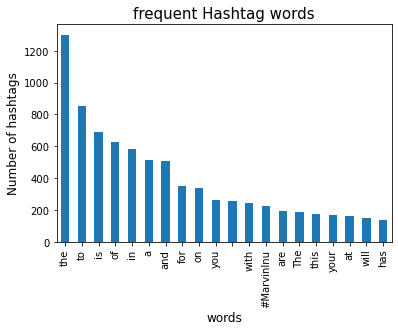

In [72]:
remove_hash_df.clean_hash.value_counts()[:20].plot(kind='bar')
plt.title('frequent Hashtag words',fontsize=15)
plt.ylabel('Number of hashtags',fontsize=12)
plt.xlabel('words',fontsize=12)
plt.show()

In [73]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [74]:
tweets_df

,original_text,sentiment,lang,hashtags,clean_text,flattened_hashtags
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,"[#gold, #silver, #crypto]",The 10-year yield is telling us that there's a...,#gold
5,RT @LanceRoberts: Buying opportunities like th...,0,en,[#bonds],Buying opportunities like this only occur ever...,#deflation
13,RT @Schuldensuehner: ECB's Lagarde: #ECB will ...,1,en,[#ECB],ECB's Lagarde: #ECB will complete asset purcha...,#illusion
14,RT @LanceRoberts: Another reason #deflation is...,-1,en,"[#deflation, #Inventories, #NewOrders]",Another reason #deflation is a larger problem ...,#markets
16,RT @LanceRoberts: Good example why #deflation ...,1,en,"[#deflation, #oil, #gas, #energy]",Good example why #deflation is coming. \nFitch...,#interventions
...,...,...,...,...,...,...
16449,"RT @ferozkhaninc: In #Telangana Rapes, Murders...",1,en,"[#Telangana, #TRS]","In #Telangana Rapes, Murders, bribery became n...",NaN
16450,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN
16451,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN
16452,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN


<AxesSubplot:>

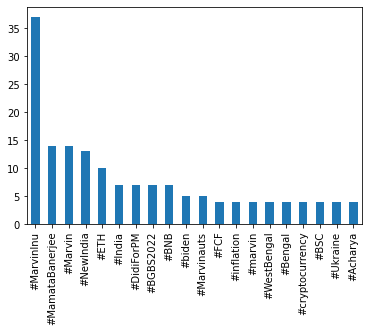

In [75]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


### Analyzing data using language attribute

In [76]:
#ploting Tweets by language 
tweets = pd.DataFrame(columns=['text','lang'])

tweets['text'] =  tweets_df['clean_text'].to_list()
tweets['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

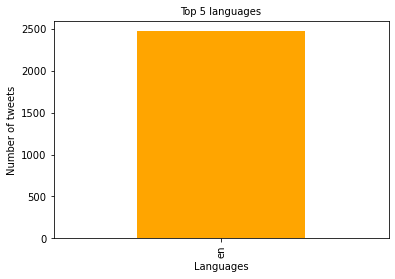

In [77]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [78]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [80]:
English_tweets

,original_text,sentiment,lang,hashtags,clean_text,flattened_hashtags
0,RT @NorthstarCharts: The 10-year yield is tell...,1,en,"[#gold, #silver, #crypto]",The 10-year yield is telling us that there's a...,#gold
5,RT @LanceRoberts: Buying opportunities like th...,0,en,[#bonds],Buying opportunities like this only occur ever...,#deflation
13,RT @Schuldensuehner: ECB's Lagarde: #ECB will ...,1,en,[#ECB],ECB's Lagarde: #ECB will complete asset purcha...,#illusion
14,RT @LanceRoberts: Another reason #deflation is...,-1,en,"[#deflation, #Inventories, #NewOrders]",Another reason #deflation is a larger problem ...,#markets
16,RT @LanceRoberts: Good example why #deflation ...,1,en,"[#deflation, #oil, #gas, #energy]",Good example why #deflation is coming. \nFitch...,#interventions
...,...,...,...,...,...,...
16449,"RT @ferozkhaninc: In #Telangana Rapes, Murders...",1,en,"[#Telangana, #TRS]","In #Telangana Rapes, Murders, bribery became n...",NaN
16450,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN
16451,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN
16452,RT @9Pcadg: #PNPKakampiMo \n#WeServeAndProtect...,-1,en,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...",#PNPKakampiMo \n#WeServeAndProtect\n#TeamPNP\n...,NaN


###Text Preprocessing

In [81]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


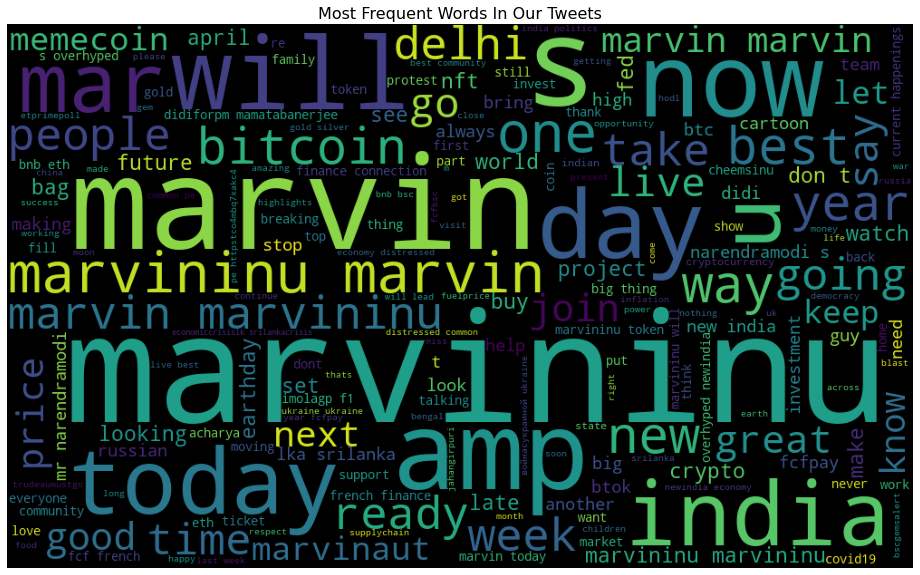

In [82]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [83]:
tweets_df.to_csv('../data/model_ready_data.csv', index=False)
print('Model Ready Data Successfully Saved.!!!')

Model Ready Data Successfully Saved.!!!


## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [ ]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['giving',
  'forth',
  'life',
  'becoming',
  'burden',
  'kenya',
  'this',
  'mother',
  'gave',
  'birth',
  'babies',
  'hard',
  'time',
  'meeting',
  'nutritional',
  'needs',
  'coz',
  'baby',
  'formula',
  'expensiveturn',
  'bundles',
  'tears',
  'joy',
  'giving',
  'handmpesa',
  'douglas',
  'nyaoko'],
 ['today',
  'world',
  'day',
  'combat',
  'restoring',
  'degraded',
  'land',
  'brings',
  'jobs',
  'food',
  'security',
  'helps',
  'recover',
  'slows',
  'locking',
  'away',
  'carbon',
  'all',
  'critical',
  'lifting',
  'many',
  'poverty']]

In [ ]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ babies
1 ........ baby
2 ........ becoming
3 ........ birth
4 ........ bundles
5 ........ burden
6 ........ coz
7 ........ douglas
8 ........ expensiveturn
9 ........ formula
10 ........ forth
11 ........ gave
12 ........ giving
13 ........ handmpesa
14 ........ hard
15 ........ joy
16 ........ kenya
17 ........ life
18 ........ meeting
19 ........ mother
20 ........ needs
21 ........ nutritional
22 ........ nyaoko
23 ........ tears
24 ........ this
25 ........ time
26 ........ all
27 ........ away
28 ........ brings
29 ........ carbon
30 ........ combat
31 ........ critical
32 ........ day
33 ........ degraded
34 ........ food
35 ........ helps
36 ........ jobs
37 ........ land
38 ........ lifting
39 ........ locking
40 ........ many
41 ........ poverty
42 ........ recover
43 ........ restoring
44 ........ security
45 ........ slows
46 ........ today
47 ........ world
48 ........ confident
49 ........ delivered
50 ........ emissions
51 ........ g7
52 ........ hearing
53 ...

In [ ]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [ ]:
corpus_1[:2]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1)],
 [(26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)]]

### Modeling